In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import linregress
from scipy.stats import entropy



In [39]:
# Set global font to Arial
plt.rcParams['font.family'] = 'Arial'

# Unclustered Radii

In [2]:
# $ lets you inject a variable into a magic command
# putting f intront lets {i} be treated as a variable and not part of the string
#eval uses the value of the string

radii_dic= {}
for i in range(0, 7):
    x = f'w_{i}_radii'
    %store -r $x
    radii_dic[x] = eval(x)

In [3]:
radii_dic.keys()

dict_keys(['w_0_radii', 'w_1_radii', 'w_2_radii', 'w_3_radii', 'w_4_radii', 'w_5_radii', 'w_6_radii'])

/var/folders/4x/v6r504vx43l3xd43p7kmbr400000gn/T/ipykernel_3245/2905832029.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontsize=15)


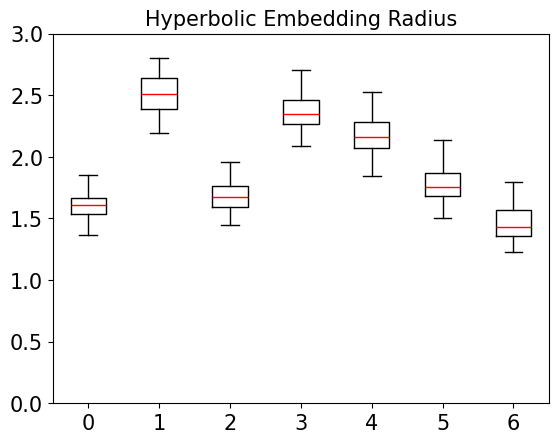

In [4]:
radii_data = list(radii_dic.values())
radii_labels = list(radii_dic.keys())

fig, ax = plt.subplots()
plt.title('Hyperbolic Embedding Radius', size = 15)
ax.boxplot(radii_data, labels = radii_labels, medianprops=dict(color='red'))
ax.set_ylim(0,3)
ax.set_yticklabels(ax.get_yticks(), fontsize=15)
ax.set_xticklabels(['0', '1', '2', '3', '4', '5', '6'], size = 15)
plt.show()
    

In [5]:
%store -r average_clustered_activity

In [6]:
#ratios of activity level by cluster by number of cells
average_clustered_activity

[368.8798414623162,
 408.86759179973296,
 353.9898365493266,
 389.2709847845777,
 391.0693593154354,
 383.10808562598476,
 399.4793066199617]

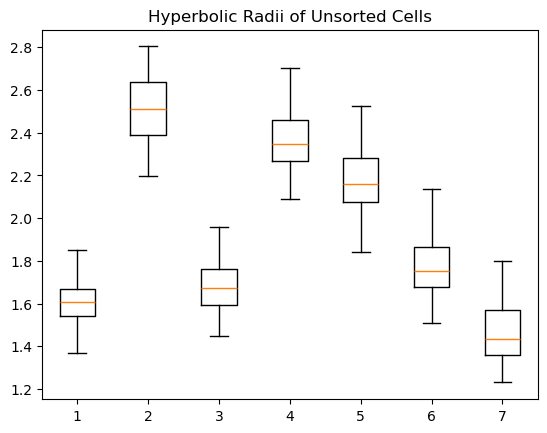

In [7]:
#extract data from boxplot, see if median trends with activity ratio
boxplot_elements = plt.boxplot(radii_data)
plt.title("Hyperbolic Radii of Unsorted Cells")
medians = boxplot_elements['medians']
median_values_unclustered_radii = [median.get_ydata()[0] for median in medians]


In [8]:
median_values_unclustered_radii

[1.607201872698037,
 2.5097612292581455,
 1.6716426664635153,
 2.3488743006321307,
 2.1573315848003567,
 1.7517764424553013,
 1.4323657250140183]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


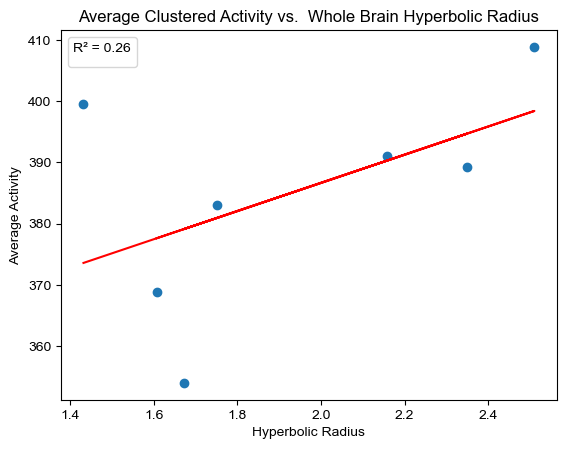

In [41]:
plt.scatter(median_values_unclustered_radii, average_clustered_activity)
plt.title('Average Clustered Activity vs.  Whole Brain Hyperbolic Radius')
plt.ylabel('Average Activity')
plt.xlabel('Hyperbolic Radius')
regression_result = linregress(median_values_unclustered_radii, average_clustered_activity)
slope = regression_result.slope
intercept = regression_result.intercept
r_value = regression_result.rvalue  # Pearson's r
r_squared = r_value**2 
# Create a line of best fit
median_values_unclustered_radii = np.array(median_values_unclustered_radii, dtype=float)
line = slope * median_values_unclustered_radii + intercept
plt.plot(median_values_unclustered_radii, line, 'r-') #label=f'y = {slope:.2f}x + {intercept:.2f}')
plt.legend(title=f'R² = {r_squared:.2f}')
plt.savefig('/Users/iuliarusu/Documents/Sharpee/final_images/figure2/activity_radius.svg', format='svg', bbox_inches='tight')


In [24]:
type(data)

list

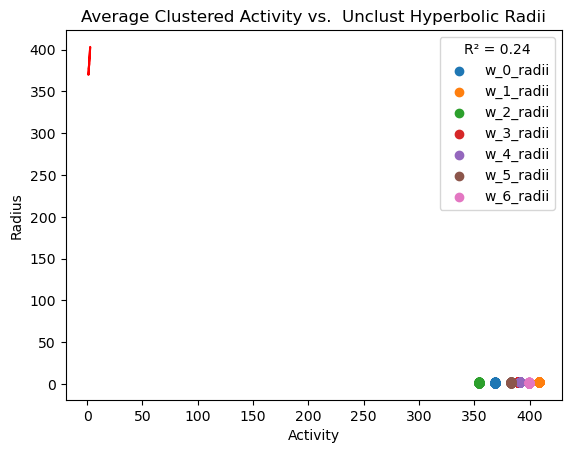

In [10]:
#instead of median values, use all values of all cells' radii

plt.title('Average Clustered Activity vs.  Unclust Hyperbolic Radii')
plt.ylabel('Radius')
plt.xlabel('Activity')

for i, (key, values) in enumerate(radii_dic.items()):
    # Scatter plot each array's points with the corresponding point in 'points'
    plt.scatter([average_clustered_activity[i]] * len(values), values, label=f'{key}')

#contcatenate all radii values into one list for looping
radii_data = []
for values in radii_dic.values():
    radii_data.extend(values)

average_clustered_activity_repeated = []
for i, values in enumerate(radii_dic.values()):
    average_clustered_activity_repeated.extend([average_clustered_activity[i]] * len(values))

regression_result = linregress(radii_data, average_clustered_activity_repeated)
slope = regression_result.slope
intercept = regression_result.intercept
r_value = regression_result.rvalue  # Pearson's r
r_squared = r_value**2 
# Create a line of best fit

line = slope * np.array(radii_data) + intercept
plt.plot(radii_data, line, 'r-') #label=f'y = {slope:.2f}x + {intercept:.2f}')
plt.legend(title=f'R² = {r_squared:.2f}')


In [11]:
%store -r average_unclust_activity


In [12]:
plt.scatter(median_values, average_unclust_activity)
plt.title('Average Unclustered Activity vs. Unclust Hyperbolic Radii')
plt.ylabel('Average Activity')
plt.xlabel('Hyperbolic Radii')
regression_result = linregress(median_values, average_unclust_activity)
slope = regression_result.slope
intercept = regression_result.intercept
r_value = regression_result.rvalue  # Pearson's r
r_squared = r_value**2 
# Create a line of best fit
median_values = np.array(median_values, dtype=float)
line = slope * median_values + intercept
plt.plot(median_values, line, 'r-', label=f'y = {slope:.2f}x + {intercept:.2f}')
plt.legend(title=f'R² = {r_squared:.2f}')

NameError: name 'median_values' is not defined

In [13]:
%store -r unclust_activity
plt.scatter(median_values, unclust_activity)
plt.title('Unclustered Activity vs. Unclust Hyperbolic Radii')
plt.ylabel('Activity')
plt.xlabel('Hyperbolic Radii')
regression_result = linregress(median_values, unclust_activity)
slope = regression_result.slope
intercept = regression_result.intercept
r_value = regression_result.rvalue  # Pearson's r
r_squared = r_value**2 
# Create a line of best fit
median_values = np.array(median_values, dtype=float)
line = slope * median_values + intercept
plt.plot(median_values, line, 'r-', label=f'y = {slope:.2f}x + {intercept:.2f}')
plt.legend(title=f'R² = {r_squared:.2f}')


NameError: name 'median_values' is not defined

In [ ]:
%store -r clustered_activity
plt.scatter(median_values, clustered_activity)
plt.title('Clustered Activity vs. Unclust Hyperbolic Radii')
plt.ylabel('Activity')
plt.xlabel('Hyperbolic Radii')
regression_result = linregress(median_values, clustered_activity)
slope = regression_result.slope
intercept = regression_result.intercept
r_value = regression_result.rvalue  # Pearson's r
r_squared = r_value**2 
# Create a line of best fit
median_values = np.array(median_values, dtype=float)
line = slope * median_values + intercept
plt.plot(median_values, line, 'r-', label=f'y = {slope:.2f}x + {intercept:.2f}')
plt.legend(title=f'R² = {r_squared:.2f}')


# clustered radii

In [14]:
clust_radii_dic= {}
for i in range(0, 7):
    x = f'w_{i}_clustered_radii'
    %store -r $x
    clust_radii_dic[x] = eval(x)

/var/folders/4x/v6r504vx43l3xd43p7kmbr400000gn/T/ipykernel_3245/981265982.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontsize=15)


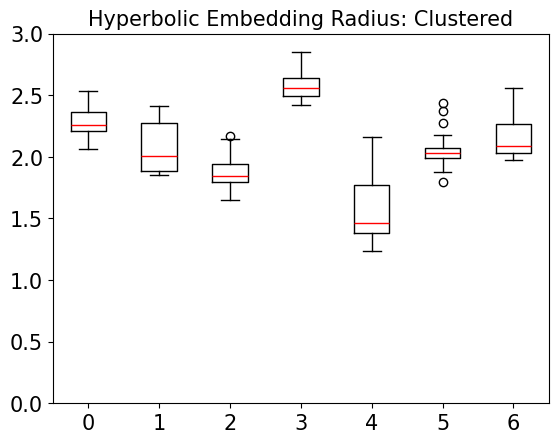

In [15]:
clust_data = list(clust_radii_dic.values())
clust_labels = list(clust_radii_dic.keys())

fig, ax = plt.subplots()
plt.title('Hyperbolic Embedding Radius: Clustered', size = 15)
ax.boxplot(clust_data, labels = clust_labels, medianprops=dict(color='red'))
ax.set_ylim(0,3)
ax.set_yticklabels(ax.get_yticks(), fontsize=15)
ax.set_xticklabels(['0', '1', '2', '3', '4', '5', '6'], size = 15)
plt.show()

Text(0.5, 1.0, 'Hyperbolic Embedding Radius: Clustered')

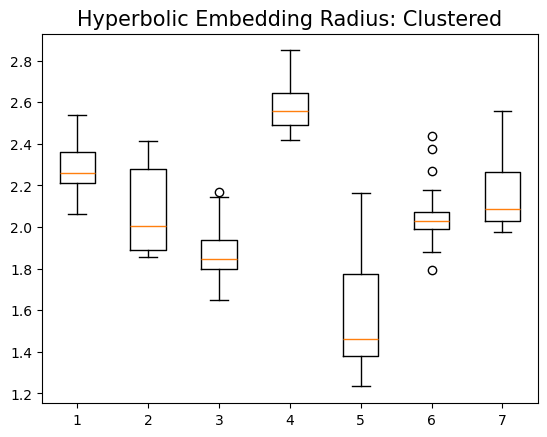

In [16]:
#extract data from boxplot, see if median trends with activity ratio
boxplot_elements = plt.boxplot(clust_data)
medians = boxplot_elements['medians']
median_values = [median.get_ydata()[0] for median in medians]
plt.title('Hyperbolic Embedding Radius: Clustered', size = 15)




In [17]:
#HDs boiler plate code for plotting points next to box and whiseker plot

fig = px.box(projection_result_df, x = ‘Age(month)’,  y=‘projection on geodesic’, color =  ‘Age(month)’, color_discrete_map = my_pal_plotly, points=‘all’, boxmode=‘overlay’)
#fig = px.box(projection_result_df, x = ‘Age(month)’,  y=‘projection on geodesic’, color =  ‘Age(month)’, color_discrete_map = my_pal_plotly, boxmode=‘overlay’)
fig.update_traces(width=0.5)
fig.update_layout(
    width=200*1.5, height=180*1.5,
    template=‘simple_white’,
    margin=go.layout.Margin(
        l=0, #left margin
        r=0, #right margin
        b=0, #bottom margin
        t=0  #top margin
    ),
    scene = dict(
        xaxis = dict(visible=False),
        yaxis = dict(visible=False),
        zaxis =dict(visible=False)
        ),
    xaxis = dict(
        tickmode = ‘array’,
        tickvals = [‘2 mons’, ‘25 mons’,‘27 mons’],
        ticktext = [‘2’, ‘25’,‘27’]
    ),
    yaxis = dict(
        tickmode = ‘array’,
        tickvals = [0.3,0.5,0.7,0.9],
        ticktext = [0.3,0.5,0.7,0.9]
    ),
    font=dict(size=16),
    xaxis_title = ‘’,#“Age(Months)“,
    yaxis_title = ‘’,#“ChromAge”,
    font_family=“Arial”, showlegend = False
)

#fig.write_image(“Behavior_ChromAge.eps”)
fig.show()

SyntaxError: invalid character '‘' (U+2018) (2948456878.py, line 3)

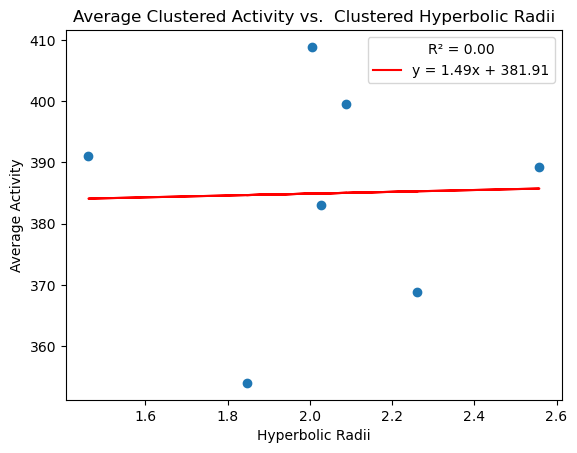

In [18]:
plt.scatter(median_values, average_clustered_activity)
plt.title('Average Clustered Activity vs.  Clustered Hyperbolic Radii')
plt.ylabel('Average Activity')
plt.xlabel('Hyperbolic Radii')
regression_result = linregress(median_values, average_clustered_activity)
slope = regression_result.slope
intercept = regression_result.intercept
r_value = regression_result.rvalue  # Pearson's r
r_squared = r_value**2 
# Create a line of best fit
median_values = np.array(median_values, dtype=float)
line = slope * median_values + intercept
plt.plot(median_values, line, 'r-', label=f'y = {slope:.2f}x + {intercept:.2f}')
plt.legend(title=f'R² = {r_squared:.2f}')

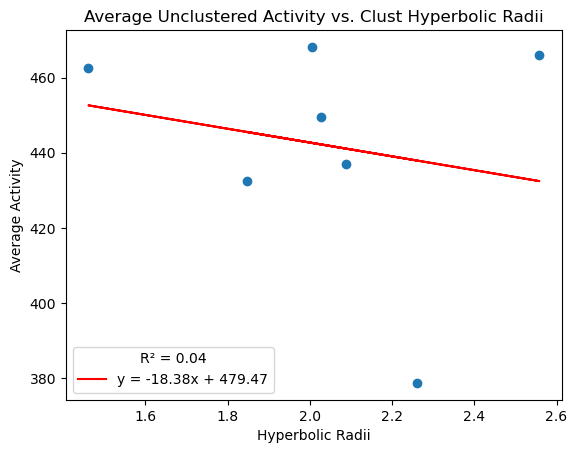

In [19]:
plt.scatter(median_values, average_unclust_activity)
plt.title('Average Unclustered Activity vs. Clust Hyperbolic Radii')
plt.ylabel('Average Activity')
plt.xlabel('Hyperbolic Radii')
regression_result = linregress(median_values, average_unclust_activity)
slope = regression_result.slope
intercept = regression_result.intercept
r_value = regression_result.rvalue  # Pearson's r
r_squared = r_value**2 
# Create a line of best fit
median_values = np.array(median_values, dtype=float)
line = slope * median_values + intercept
plt.plot(median_values, line, 'r-', label=f'y = {slope:.2f}x + {intercept:.2f}')
plt.legend(title=f'R² = {r_squared:.2f}')

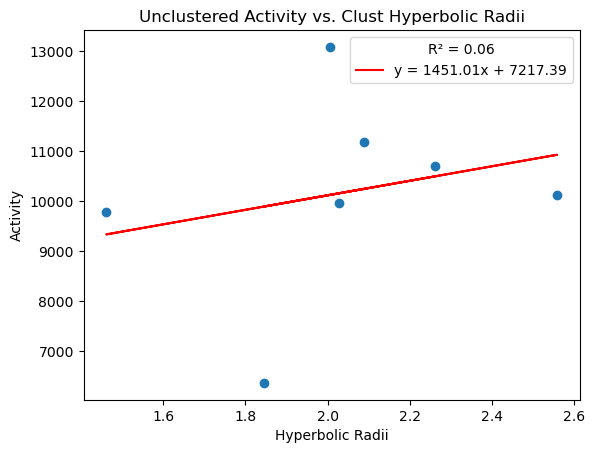

In [20]:
plt.scatter(median_values, unclust_activity)
plt.title('Unclustered Activity vs. Clust Hyperbolic Radii')
plt.ylabel('Activity')
plt.xlabel('Hyperbolic Radii')
regression_result = linregress(median_values, unclust_activity)
slope = regression_result.slope
intercept = regression_result.intercept
r_value = regression_result.rvalue  # Pearson's r
r_squared = r_value**2 
# Create a line of best fit
median_values = np.array(median_values, dtype=float)
line = slope * median_values + intercept
plt.plot(median_values, line, 'r-', label=f'y = {slope:.2f}x + {intercept:.2f}')
plt.legend(title=f'R² = {r_squared:.2f}')

In [21]:
plt.scatter(median_values, clustered_activity)
plt.title('Clustered Activity vs. Clust Hyperbolic Radii')
plt.ylabel('Activity')
plt.xlabel('Hyperbolic Radii')
regression_result = linregress(median_values, clustered_activity)
slope = regression_result.slope
intercept = regression_result.intercept
r_value = regression_result.rvalue  # Pearson's r
r_squared = r_value**2 
# Create a line of best fit
median_values = np.array(median_values, dtype=float)
line = slope * median_values + intercept
plt.plot(median_values, line, 'r-', label=f'y = {slope:.2f}x + {intercept:.2f}')
plt.legend(title=f'R² = {r_squared:.2f}')

NameError: name 'clustered_activity' is not defined

# entropy vs radius


In [22]:
ON = pd.read_csv('/Users/iuliarusu/Documents/Sharpee/Clustering/clustered_bacterial_stim/ON_cluster.csv') 
OFF = pd.read_csv('/Users/iuliarusu/Documents/Sharpee/Clustering/clustered_bacterial_stim/OFF_cluster.csv')
AVA_0_df = pd.read_csv ('/Users/iuliarusu/Documents/Sharpee/Clustering/clustered_bacterial_stim/AVA_0_df.csv')
RME_0_df = pd.read_csv ('/Users/iuliarusu/Documents/Sharpee/Clustering/clustered_bacterial_stim/RME_0_df.csv')
SMDD_0_df = pd.read_csv ('/Users/iuliarusu/Documents/Sharpee/Clustering/clustered_bacterial_stim/SMDD_0_df.csv')
SMDV_0_df = pd.read_csv ('/Users/iuliarusu/Documents/Sharpee/Clustering/clustered_bacterial_stim/SMDV_0_df.csv')


AVA_1_df = pd.read_csv ('/Users/iuliarusu/Documents/Sharpee/Clustering/clustered_bacterial_stim/AVA_1_df.csv')
RME_1_df = pd.read_csv ('/Users/iuliarusu/Documents/Sharpee/Clustering/clustered_bacterial_stim/RME_1_df.csv')
SMDD_1_df = pd.read_csv ('/Users/iuliarusu/Documents/Sharpee/Clustering/clustered_bacterial_stim/SMDD_1_df.csv')
SMDV_1_df = pd.read_csv ('/Users/iuliarusu/Documents/Sharpee/Clustering/clustered_bacterial_stim/SMDV_1_df.csv')


AVA_2_df = pd.read_csv ('/Users/iuliarusu/Documents/Sharpee/Clustering/clustered_bacterial_stim/AVA_2_df.csv')
RME_2_df = pd.read_csv ('/Users/iuliarusu/Documents/Sharpee/Clustering/clustered_bacterial_stim/RME_2_df.csv')
SMDD_2_df = pd.read_csv ('/Users/iuliarusu/Documents/Sharpee/Clustering/clustered_bacterial_stim/SMDD_2_df.csv')
SMDV_2_df = pd.read_csv ('/Users/iuliarusu/Documents/Sharpee/Clustering/clustered_bacterial_stim/SMDV_2_df.csv')


AVA_3_df = pd.read_csv ('/Users/iuliarusu/Documents/Sharpee/Clustering/clustered_bacterial_stim/AVA_3_df.csv')
RME_3_df = pd.read_csv ('/Users/iuliarusu/Documents/Sharpee/Clustering/clustered_bacterial_stim/RME_3_df.csv')
SMDD_3_df = pd.read_csv ('/Users/iuliarusu/Documents/Sharpee/Clustering/clustered_bacterial_stim/SMDD_3_df.csv')
SMDV_3_df = pd.read_csv ('/Users/iuliarusu/Documents/Sharpee/Clustering/clustered_bacterial_stim/SMDV_3_df.csv')


AVA_4_df = pd.read_csv ('/Users/iuliarusu/Documents/Sharpee/Clustering/clustered_bacterial_stim/AVA_4_df.csv')
RME_4_df = pd.read_csv ('/Users/iuliarusu/Documents/Sharpee/Clustering/clustered_bacterial_stim/RME_4_df.csv')
SMDD_4_df = pd.read_csv ('/Users/iuliarusu/Documents/Sharpee/Clustering/clustered_bacterial_stim/SMDD_4_df.csv')
SMDV_4_df = pd.read_csv ('/Users/iuliarusu/Documents/Sharpee/Clustering/clustered_bacterial_stim/SMDV_4_df.csv')


AVA_5_df = pd.read_csv ('/Users/iuliarusu/Documents/Sharpee/Clustering/clustered_bacterial_stim/AVA_5_df.csv')
RME_5_df = pd.read_csv ('/Users/iuliarusu/Documents/Sharpee/Clustering/clustered_bacterial_stim/RME_5_df.csv')
SMDD_5_df = pd.read_csv ('/Users/iuliarusu/Documents/Sharpee/Clustering/clustered_bacterial_stim/SMDD_5_df.csv')
SMDV_5_df = pd.read_csv ('/Users/iuliarusu/Documents/Sharpee/Clustering/clustered_bacterial_stim/SMDV_5_df.csv')


AVA_6_df = pd.read_csv ('/Users/iuliarusu/Documents/Sharpee/Clustering/clustered_bacterial_stim/AVA_6_df.csv')
RME_6_df = pd.read_csv ('/Users/iuliarusu/Documents/Sharpee/Clustering/clustered_bacterial_stim/RME_6_df.csv')
SMDD_6_df = pd.read_csv ('/Users/iuliarusu/Documents/Sharpee/Clustering/clustered_bacterial_stim/SMDD_6_df.csv')
SMDV_6_df = pd.read_csv ('/Users/iuliarusu/Documents/Sharpee/Clustering/clustered_bacterial_stim/SMDV_6_df.csv')

In [23]:
ON_0 = ON[ON['worm_id'] == 0]
OFF_0 = OFF[OFF['worm_id'] == 0]

ON_1 = ON[ON['worm_id'] == 1]
OFF_1 = OFF[OFF['worm_id'] == 1]

ON_2 = ON[ON['worm_id'] == 2]
OFF_2 = OFF[OFF['worm_id'] == 2]

ON_3 = ON[ON['worm_id'] == 3]
OFF_3 = OFF[OFF['worm_id'] == 3]

ON_4 = ON[ON['worm_id'] == 4]
OFF_4 = OFF[OFF['worm_id'] == 4]

ON_5 = ON[ON['worm_id'] == 5]
OFF_5 = OFF[OFF['worm_id'] == 5]

ON_6 = ON[ON['worm_id'] == 6]
OFF_6 = OFF[OFF['worm_id'] == 6]

In [24]:
# example for w0
ON_0 = np.array(ON_0.iloc[:, 1: -2])
OFF_0 = np.array(OFF_0.iloc[:, 1: -2])
AVA_0 = np.array(AVA_0_df.iloc[:, 1: -2])
RME_0 = np.array(RME_0_df.iloc[:, 1: -2])
SMDV_0 = np.array(SMDV_0_df.iloc[:, 1: -2])
SMDD_0 = np.array(SMDD_0_df.iloc[:, 1: -2])

ON_1 = np.array(ON_1.iloc[:, 1: -2])
OFF_1 = np.array(OFF_1.iloc[:, 1: -2])
AVA_1 = np.array(AVA_1_df.iloc[:, 1: -3])
RME_1 = np.array(RME_1_df.iloc[:, 1: -3])
SMDV_1 = np.array(SMDV_1_df.iloc[:, 1: -3])
SMDD_1 = np.array(SMDD_1_df.iloc[:, 1: -3])

ON_2 = np.array(ON_2.iloc[:, 1: -2])
OFF_2 = np.array(OFF_2.iloc[:, 1: -2])
AVA_2 = np.array(AVA_2_df.iloc[:, 1: -3])
RME_2 = np.array(RME_2_df.iloc[:, 1: -3])
SMDV_2 = np.array(SMDV_2_df.iloc[:, 1: -3])
SMDD_2 = np.array(SMDD_2_df.iloc[:, 1: -3])

ON_3 = np.array(ON_3.iloc[:, 1: -2])
OFF_3 = np.array(OFF_3.iloc[:, 1: -2])
AVA_3 = np.array(AVA_3_df.iloc[:, 1: -3])
RME_3 = np.array(RME_3_df.iloc[:, 1: -3])
SMDV_3 = np.array(SMDV_3_df.iloc[:, 1: -3])
SMDD_3 = np.array(SMDD_3_df.iloc[:, 1: -3])

ON_4 = np.array(ON_4.iloc[:, 1: -2])
OFF_4 = np.array(OFF_4.iloc[:, 1: -2])
AVA_4 = np.array(AVA_4_df.iloc[:, 1: -3])
RME_4 = np.array(RME_4_df.iloc[:, 1: -3])
SMDV_4 = np.array(SMDV_4_df.iloc[:, 1: -3])
SMDD_4 = np.array(SMDD_4_df.iloc[:, 1: -3])

ON_5 = np.array(ON_5.iloc[:, 1: -2])
OFF_5 = np.array(OFF_5.iloc[:, 1: -2])
AVA_5 = np.array(AVA_5_df.iloc[:, 1: -3])
RME_5 = np.array(RME_5_df.iloc[:, 1: -3])
SMDV_5 = np.array(SMDV_5_df.iloc[:, 1: -3])
SMDD_5 = np.array(SMDD_5_df.iloc[:, 1: -3])

ON_6 = np.array(ON_6.iloc[:, 1: -2])
OFF_6 = np.array(OFF_6.iloc[:, 1: -2])
AVA_6 = np.array(AVA_6_df.iloc[:, 1: -3])
RME_6 = np.array(RME_6_df.iloc[:, 1: -3])
SMDV_6 = np.array(SMDV_6_df.iloc[:, 1: -3])
SMDD_6 = np.array(SMDD_6_df.iloc[:, 1: -3])



In [25]:
#concatenate all cell types
w_0 = np.concatenate((ON_0, OFF_0, AVA_0, RME_0, SMDV_0, SMDD_0), axis=0)
w_1 = np.concatenate((ON_1, OFF_1, AVA_1, RME_1, SMDV_1, SMDD_1), axis=0)
w_2 = np.concatenate((ON_2, OFF_2, AVA_2, RME_2, SMDV_2, SMDD_2), axis=0)
w_3 = np.concatenate((ON_3, OFF_3, AVA_3, RME_3, SMDV_3, SMDD_3), axis=0)
w_4 = np.concatenate((ON_4, OFF_4, AVA_4, RME_4, SMDV_4, SMDD_4), axis=0)
w_5 = np.concatenate((ON_5, OFF_5, AVA_5, RME_5, SMDV_5, SMDD_5), axis=0)
w_6 = np.concatenate((ON_6, OFF_6, AVA_6, RME_6, SMDV_6, SMDD_6), axis=0)

In [26]:
#concatenate ws
all_ws_clustered = np.concatenate((w_0, w_1, w_2, w_3, w_4, w_5, w_6), axis=0)
all_ws_clustered = pd.DataFrame(all_ws_clustered)



In [27]:
column = ['ON'] * (ON_0.shape[0]) + ['OFF'] * (OFF_0.shape[0]) + ['AVA'] * (AVA_0.shape[0]) + ['RME'] * (RME_0.shape[0]) + ['SMDV'] * (SMDV_0.shape[0]) + ['SMDD'] * (SMDD_0.shape[0]) + ['ON'] * (ON_1.shape[0]) + ['OFF'] * (OFF_1.shape[0]) + ['AVA'] * (AVA_1.shape[0]) + ['RME'] * (RME_1.shape[0]) + ['SMDV'] * (SMDV_1.shape[0]) + ['SMDD'] * (SMDD_1.shape[0]) + ['ON'] * (ON_2.shape[0]) + ['OFF'] * (OFF_2.shape[0]) + ['AVA'] * (AVA_2.shape[0]) + ['RME'] * (RME_2.shape[0]) + ['SMDV'] * (SMDV_2.shape[0]) + ['SMDD'] * (SMDD_2.shape[0]) + ['ON'] * (ON_3.shape[0]) + ['OFF'] * (OFF_3.shape[0]) + ['AVA'] * (AVA_3.shape[0]) + ['RME'] * (RME_3.shape[0]) + ['SMDV'] * (SMDV_3.shape[0]) + ['SMDD'] * (SMDD_3.shape[0]) + ['ON'] * (ON_4.shape[0]) + ['OFF'] * (OFF_4.shape[0]) + ['AVA'] * (AVA_4.shape[0]) + ['RME'] * (RME_4.shape[0]) + ['SMDV'] * (SMDV_4.shape[0]) + ['SMDD'] * (SMDD_4.shape[0]) + ['ON'] * (ON_5.shape[0]) + ['OFF'] * (OFF_5.shape[0]) + ['AVA'] * (AVA_5.shape[0]) + ['RME'] * (RME_5.shape[0]) + ['SMDV'] * (SMDV_5.shape[0]) + ['SMDD'] * (SMDD_5.shape[0]) + ['ON'] * (ON_6.shape[0]) + ['OFF'] * (OFF_6.shape[0]) + ['AVA'] * (AVA_6.shape[0]) + ['RME'] * (RME_6.shape[0]) + ['SMDV'] * (SMDV_6.shape[0]) + ['SMDD'] * (SMDD_6.shape[0])
cell_type = np.array(column)
all_ws_clustered['cell_type'] = cell_type

#worm id column
worm_id = [0] * (ON_0.shape[0] + OFF_0.shape[0] + AVA_0.shape[0] + RME_0.shape[0] + SMDV_0.shape[0] + SMDD_0.shape[0]) + [1] * (ON_1.shape[0] + OFF_1.shape[0] + AVA_1.shape[0] + RME_1.shape[0] + SMDV_1.shape[0] + SMDD_1.shape[0]) + [2] * (ON_2.shape[0] + OFF_2.shape[0] + AVA_2.shape[0] + RME_2.shape[0] + SMDV_2.shape[0] + SMDD_2.shape[0]) + [3] * (ON_3.shape[0] + OFF_3.shape[0] + AVA_3.shape[0] + RME_3.shape[0] + SMDV_3.shape[0] + SMDD_3.shape[0]) + [4] * (ON_4.shape[0] + OFF_4.shape[0] + AVA_4.shape[0] + RME_4.shape[0] + SMDV_4.shape[0] + SMDD_4.shape[0]) + [5] * (ON_5.shape[0] + OFF_5.shape[0] + AVA_5.shape[0] + RME_5.shape[0] + SMDV_5.shape[0] + SMDD_5.shape[0]) + [6] * (ON_6.shape[0] + OFF_6.shape[0] + AVA_6.shape[0] + RME_6.shape[0] + SMDV_6.shape[0] + SMDD_6.shape[0])
worm_id = np.array(worm_id)
all_ws_clustered['worm_id'] = worm_id


In [28]:
all_ws_clustered.tail()

,0,1,2,3,4,5,6,7,8,9,...,1592,1593,1594,1595,1596,1597,1598,1599,cell_type,worm_id
179,0.451667,0.260361,0.374523,0.333417,0.296303,0.298341,0.353166,0.275606,0.337890,0.325894,...,0.106031,0.075282,0.125328,0.123972,0.106423,0.056287,0.071927,0.138741,RME,6
180,0.161421,0.122925,0.152240,0.113289,0.108943,0.120792,0.113263,0.112031,0.109941,0.129438,...,0.022255,0.019681,0.037760,0.027895,0.011420,0.013922,0.007703,0.034923,SMDV,6
181,0.369088,0.340746,0.314790,0.297447,0.256540,0.212337,0.201304,0.296253,0.233145,0.227632,...,0.034247,0.069591,0.087507,0.083285,0.035668,0.048541,0.059006,0.046408,SMDV,6
182,0.091142,0.103064,0.103241,0.086204,0.096538,0.102718,0.094449,0.066989,0.092214,0.087939,...,0.181331,0.162653,0.182036,0.159335,0.197864,0.206459,0.220786,0.211384,SMDD,6
183,0.092022,0.054678,0.081263,0.069906,0.075115,0.030517,0.069158,0.062356,0.059622,0.069981,...,0.131139,0.133919,0.165936,0.198447,0.195714,0.236082,0.283035,0.257907,SMDD,6


In [29]:
# Convert to a histogram that represents a probability distribution
entropies = []

for index, row in all_ws_clustered.iloc[:, : -2].iterrows():
    hist, bin_edges = np.histogram(row, bins=10, density=True)
    probabilities = hist * np.diff(bin_edges)
      # This ensures the integral over the range is 1.
    
# Calculate the entropy
    ent = entropy(probabilities, base=2)
    probabilities = probabilities[probabilities > 0]  
    entropies.append(ent)



In [30]:
all_ws_clustered['entropy'] = entropies

In [31]:
all_ws_clustered.head()

,0,1,2,3,4,5,6,7,8,9,...,1593,1594,1595,1596,1597,1598,1599,cell_type,worm_id,entropy
0,0.111328,0.113690,0.104047,0.097544,0.128698,0.096889,0.113149,0.091761,0.110592,0.098088,...,0.087761,0.072876,0.105107,0.077777,0.120296,0.086403,0.073250,ON,0,1.533611
1,0.111844,0.125500,0.085508,0.112997,0.101238,0.122276,0.166369,0.147508,0.098558,0.156589,...,0.147703,0.164014,0.274072,0.282609,0.370823,0.395895,0.326826,ON,0,1.574685
2,0.192604,0.220196,0.185329,0.198972,0.199652,0.214086,0.204000,0.212617,0.200606,0.209405,...,0.125827,0.116286,0.147985,0.199686,0.212018,0.182312,0.149742,ON,0,1.724822
3,0.123674,0.123468,0.094402,0.088443,0.088383,0.105112,0.108088,0.097864,0.118637,0.101049,...,0.070331,0.098578,0.078554,0.111078,0.113384,0.065145,0.054949,ON,0,1.568101
4,0.999277,0.966674,1.000000,0.947146,0.234203,0.886421,0.281143,0.251201,0.157087,0.222240,...,0.148310,0.246808,0.267268,0.320307,0.321483,0.281932,0.206321,ON,0,2.120277


In [32]:
average_entropies = []
for i in range(0, 7):
    avg = np.average(all_ws_clustered[all_ws_clustered['worm_id'] == i]['entropy'])
    average_entropies.append(avg)

In [33]:
average_entropies

[2.2116772739769273,
 2.2679383734207423,
 2.3279821128409774,
 2.417488699795973,
 2.3458771168263075,
 2.356972938530707,
 2.332679553401967]

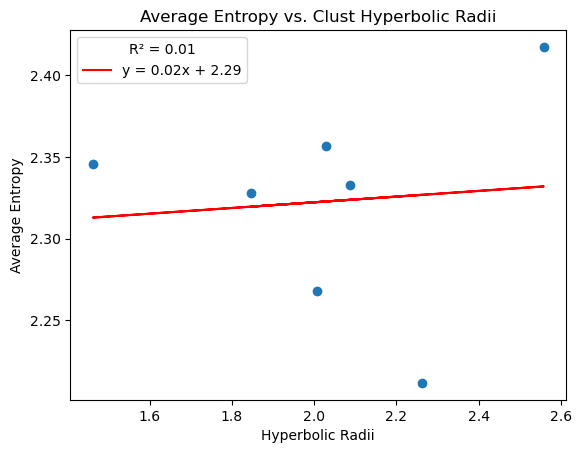

In [34]:
plt.scatter(median_values, average_entropies)
plt.title('Average Entropy vs. Clust Hyperbolic Radii')
plt.ylabel('Average Entropy')
plt.xlabel('Hyperbolic Radii')
regression_result = linregress(median_values, average_entropies)
slope = regression_result.slope
intercept = regression_result.intercept
r_value = regression_result.rvalue  # Pearson's r
r_squared = r_value**2 
# Create a line of best fit
median_values = np.array(median_values, dtype=float)
line = slope * median_values + intercept
plt.plot(median_values, line, 'r-', label=f'y = {slope:.2f}x + {intercept:.2f}')
plt.legend(title=f'R² = {r_squared:.2f}')

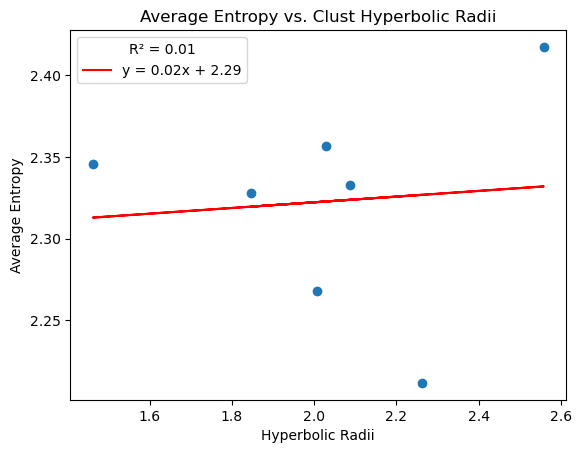

In [35]:
# average entropies vs average unclustered radii
plt.scatter(median_values, average_entropies)
plt.title('Average Entropy vs. Clust Hyperbolic Radii')
plt.ylabel('Average Entropy')
plt.xlabel('Hyperbolic Radii')
regression_result = linregress(median_values, average_entropies)
slope = regression_result.slope
intercept = regression_result.intercept
r_value = regression_result.rvalue  # Pearson's r
r_squared = r_value**2 
# Create a line of best fit
median_values = np.array(median_values, dtype=float)
line = slope * median_values + intercept
plt.plot(median_values, line, 'r-', label=f'y = {slope:.2f}x + {intercept:.2f}')
plt.legend(title=f'R² = {r_squared:.2f}')

In [36]:
%store all_ws_clustered

Stored 'all_ws_clustered' (DataFrame)


# Average Entropy Unclustered vs Unclustered Radius

In [ ]:
bacteria = np.load('/Users/iuliarusu/Documents/Sharpee/ProcAiryData/Yfull_op50_SF.npz')
bacteria_arr_0= bacteria['arr_1']
bacteria_0_df = pd.DataFrame(bacteria_arr_0)